In [14]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import random
import numpy as np

In [381]:
X, y = make_blobs(n_samples=100, random_state=1)

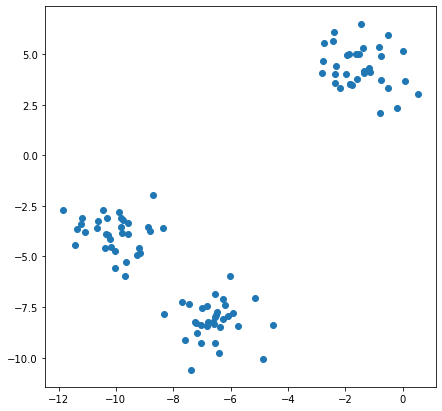

In [88]:
plt.figure(figsize=(7,7))
plt.scatter(X[:, 0], X[:, 1])

In [384]:
X[0:5]

array([[ -0.79415228,   2.10495117],
       [ -9.15155186,  -4.81286449],
       [-11.44182631,  -4.45781441],
       [ -9.76761777,  -3.19133737],
       [ -4.53655648,  -8.40186288]])

In [17]:
def e_metrics(x1, x2):
    
    distance = 0
    for i in range(len(x1)):
        distance += np.square(x1[i] - x2[i])
    
    return np.sqrt(distance)

In [390]:
def kmeans(data, k, max_iterations, min_distance):
    # Создадим словарь для классификации
    classes = {i: [] for i in range(k)}
    
    # инициализируем центроиды как первые k элементов датасета
    centroids = [data[i] for i in range(k)]
    
    
    distances_list = []
    for _ in range(max_iterations):
        # классифицируем объекты по центроидам
        for x in data:
            # определим расстояния от объекта до каждого центроида
            distances = [e_metrics(x, centroid) for centroid in centroids]
            # отнесем объект к кластеру, до центроида которого наименьшее расстояние
            classification = distances.index(min(distances))
            classes[classification].append(x)
            distances_list.append(distances)
            ## print(classes[classification])
          
        
        # сохраним предыдущие центроиды в отдельный список для последующего сравнения сновыми
        old_centroids = centroids.copy()
        
        # пересчитаем центроиды как среднее по кластерам
        for classification in classes:
            centroids[classification] = np.average(classes[classification], axis=0)
            ##print(centroids[classification])
        
        
            
        # сравним величину смещения центроидов с минимальной
        optimal = True
        for centroid in range(len(centroids)):
            if np.sum(abs((centroids[centroid] - old_centroids[centroid]) / old_centroids * 100)) > min_distance:
                optimal = False
                
        # если все смещения меньше минимального, останавливаем алгоритм  
        if optimal:
            break
                
    return old_centroids, classes

In [391]:
def visualize(centroids, classes):
    colors = ['r', 'g', 'b']
    
    plt.figure(figsize=(7,7))
    
    # нанесем на график центроиды
    for centroid in centroids:
        plt.scatter(centroid[0], centroid[1], marker='x', s=130, c='black')
        
    # нанесем объекты раскрашенные по классам
    for class_item in classes:
        for x in classes[class_item]:
            plt.scatter(x[0], x[1], color=colors[class_item])
            
    plt.show()

In [392]:
# определим максимальное количество итераций
max_iterations = 1

# и минимальное расстояние между центроидами до пересчета и после него, при котором нужно остановить алгоритм
min_distance = 1e-4

# сразу определим известное нам количество кластеров
k = 3

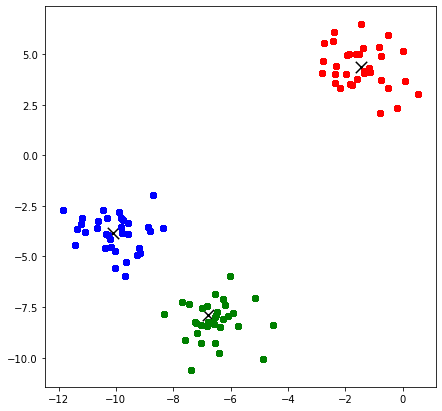

In [393]:
centroids, clusters = kmeans(X, k, 10, min_distance)

visualize(centroids, clusters)

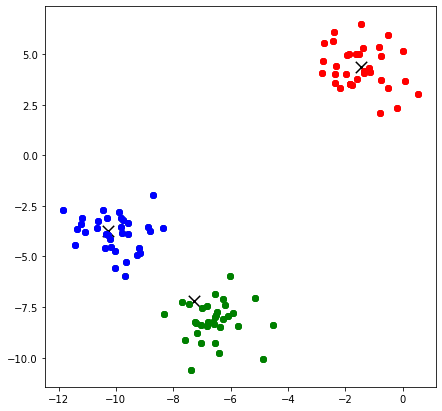

In [394]:
max_iterations = 3

centroids, clusters = kmeans(X, k, max_iterations, min_distance)

visualize(centroids, clusters)

(*) Написать функцию подсчета метрики качества кластеризации как среднее квадратичное внутриклассовое расстояние и построить график ее зависимости от количества кластеров k (взять от 1 до 10) для выборки данных из этого урока (создать датасет, как в методичке).

In [395]:
max_iterations = 10

In [396]:
## функция качества кластеризации как среднее квадратичное внутриклассовое расстояние
def quality(centroids, clusters):
    quality_list = []
    dist_list =[]
    quality = 0
    for i in range(len(clusters)):
        for n in range(len(clusters[i])):
            distances = e_metrics(clusters[i][n], centroids[i])
            dist_list.append(distances)
            quality = np.std(dist_list)
        quality_list.append(quality)
    return (quality_list)

In [369]:
quality(centroids, clusters)

[0.6103172144829526, 0.8312236233500027, 0.7519068791155843]

In [404]:
max_iterations == 20
total_qual_list = []
l = []
for i in range(max_iterations):
    centroids, clusters = kmeans(X, k, i, min_distance)
    l = quality(centroids, clusters)
    total_qual_list.append(l)
print(total_qual_list)

UnboundLocalError: local variable 'old_centroids' referenced before assignment

In [405]:
centr1 = []
centr2 = []
centr3 = []
for i in range(len(total_quality)):
    centr1.append(total_quality[i][0])
    centr2.append(total_quality[i][1])
    centr3.append(total_quality[i][2])
print(centr1, centr2, centr3)

[0.9887058880255087, 0.6103172144829536, 0.6103172144829536, 0.6103172144829536, 0.6103172144829536, 0.6103172144829536, 0.6103172144829535, 0.6103172144829532, 0.610317214482953, 0.6103172144829528, 0.6103172144829527, 0.6103172144829526, 0.6103172144829526, 0.6103172144829526, 0.6103172144829526, 0.6103172144829526] [1.4968750290545396, 1.0047087275080386, 1.0427949048654075, 1.039194568381947, 1.0179114638726778, 0.9915369928191049, 0.967164006112581, 0.9262844222078904, 0.9093285829222737, 0.8942827160336907, 0.8808688915235123, 0.8688502276690733, 0.8580283399690796, 0.8482379774164823, 0.8393414408566224, 0.8312236233500027] [1.5160792396160574, 0.9869407489338563, 0.9687136939615465, 0.9448845209023673, 0.917251552587787, 0.8902570464129782, 0.8671580161222174, 0.8306411991086928, 0.8160699397083355, 0.8033614228613555, 0.7921869037482847, 0.7822877956347521, 0.7734591439075821, 0.7655369907403213, 0.7583889006416857, 0.7519068791155843]


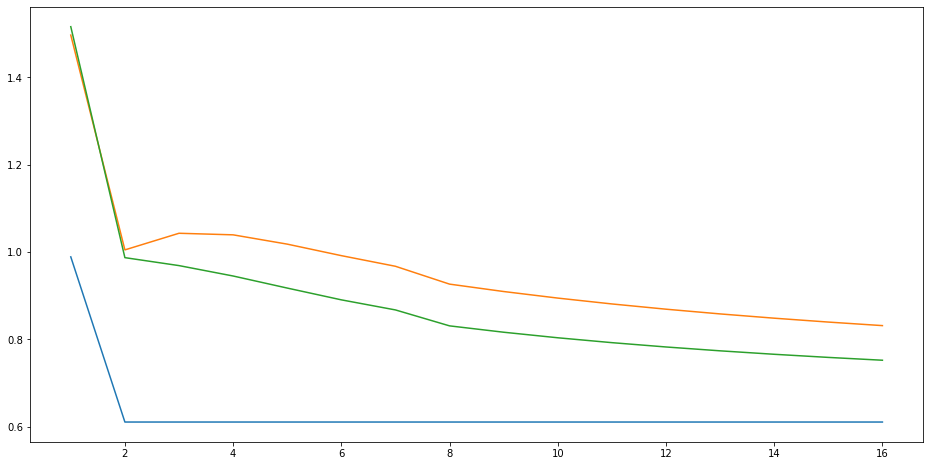

In [406]:
plt.figure(figsize = (16,8))
xlim = (1, 11)
ylim = (0, 1)
plt.plot(range(1,len(centr1)+1), centr1)
plt.plot(range(1,len(centr2)+1), centr2)
plt.plot(range(1,len(centr2)+1), centr3)
plt.show()

In [ ]:
Почему-то первый кластер не меняется в зависимости от изменений количества итераций, начиная с max_iterations = 2.